<a href="https://colab.research.google.com/github/kazukiigeta/StatisticsForestChannel/blob/main/notebooks/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. ライブラリのインポート

In [ ]:
# 必須ライブラリ
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import scatter_matrix

In [ ]:
# 分析対象のデータセットを入手するためのライブラリ（必須でない）
from sklearn.datasets import load_iris

In [ ]:
# 決定木可視化用のライブラリの追加インストールおよびインポート（必須）
! pip install -q dtreeviz
from dtreeviz.trees import dtreeviz

     |████████████████████████████████| 61 kB 232 kB/s 


In [ ]:
# 他に使いたいライブラリがあれば各自インポートしてください

# 2. データの用意

分類したいデータをpandasのDataFrameの形式で用意します。

**例として使用するIrisデータセット**:

花の一種であるアヤメのサイズと種類が記録されています

|列名|説明|
|-|-|
|sepal length (cm)|ガクの長さ|
|sepal width (cm)|ガクの幅|
|petal length (cm)|花弁の長さ|
|petal width (cm)|花弁の幅|
|target|アヤメの種類; 0~2の３種類|

In [ ]:
# 例として用いるDataFrameの用意
iris = load_iris()

data = iris['data']
target = iris['target']
feature_names = iris['feature_names']
target_names = iris['target_names']

df = pd.DataFrame(data=np.c_[data, target],
                  columns=feature_names+['target'])

In [ ]:
#　中身を確認
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


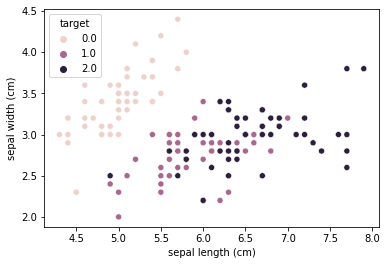

In [ ]:
# sepal width と sepal length の関係性
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df)

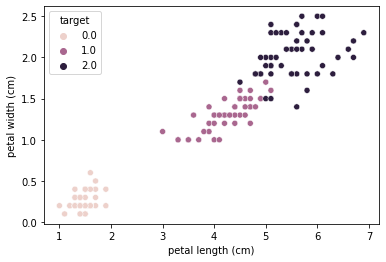

In [ ]:
# petal width と petal length の関係性
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=df)

In [ ]:
# 特徴量だけのDataFrameを作成
X = df[feature_names]

# targetだけのSeriesを作成
y = df['target']

# 3. 決定木の学習

In [ ]:
# 最大深さ3（max_depth）の決定木をを学習
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X=X, y=y)

# 4. 決定木の可視化

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atlea

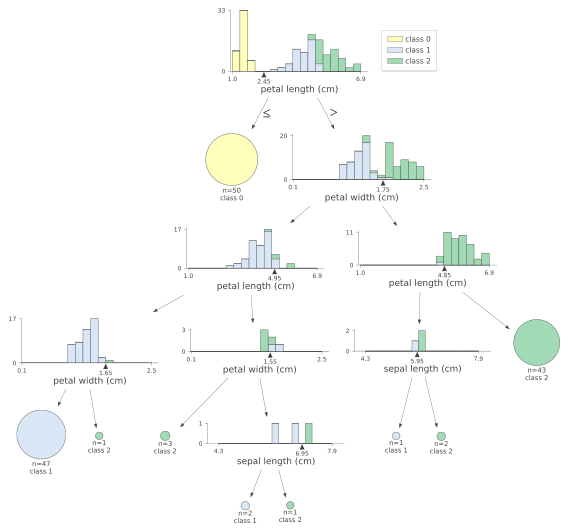

In [ ]:
# 決定木を可視化
viz = dtreeviz(clf, x_data=X, y_data=y,
               feature_names=feature_names)

viz